# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.Simulator(results, waves =  80, bundles =  5000000, bundle_size = 1)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 87232512


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/80 [00:00<?, ?it/s]

# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 16:19:59  Samples:  17284
 /_//_/// /_\ / //_// / //_'/ //     Duration: 120.433   CPU time: 120.506
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-5f9ff51e-a16f-419e-81b6-35c7d8863f70.json

120.433 run_code  IPython/core/interactiveshell.py:3400
└─ 120.433 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 120.433 run_all_waves  simulation.py:26
      └─ 120.324 run  simulation.py:120
         └─ 119.550 record_results  simulation.py:32
            ├─ 86.111 histogram  stats_cuda.py:51
            │  ├─ 44.307 histogram_4d  stats_cuda.py:298
            │  │  └─ 43.973 histogramdd  cupy/_statistics/histogram.py:285
            │  │     ├─ 35.114 [self]  
            │  │     └─ 8.567 bincount  cupy/_statistics/histogram.py:513
            │  │        └─ 8.554 [self]  
            │  ├─ 32.730 counter  stats_cuda.py:239
      

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))
print(cp.sum(results._box_stage._histogram_4d_count._hist))
print(cp.sum(results._diffuser_stage._histogram_4d_count._hist))


399999926.0
340829064.0
212458204.0


# <center> Source

total photons: 2.00e+16
photon bundle count: 4.00e+08
photon total energy (J): 5.50e-03
photon total power (W): 5.50e+00


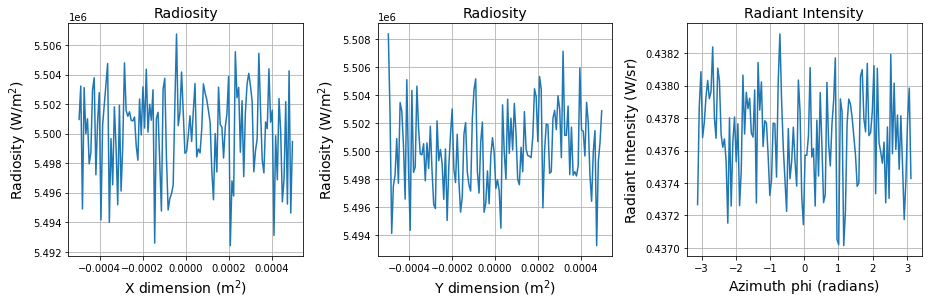

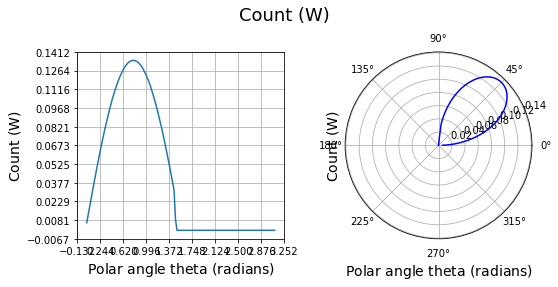

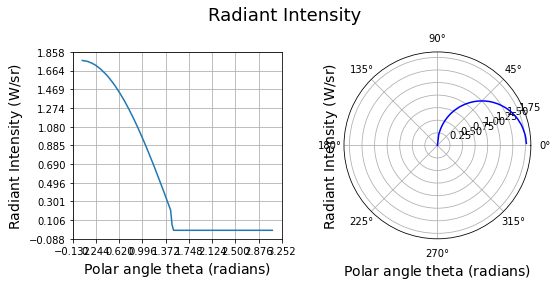

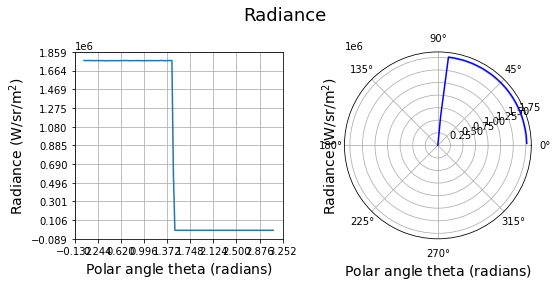

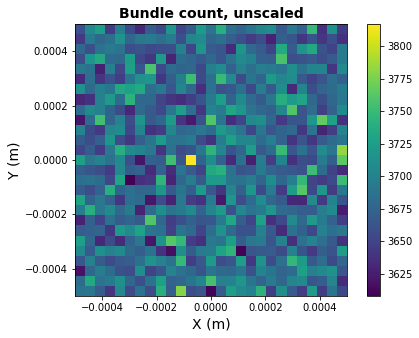

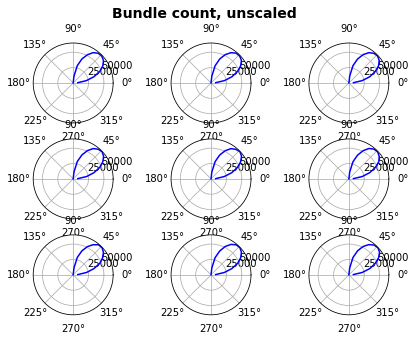

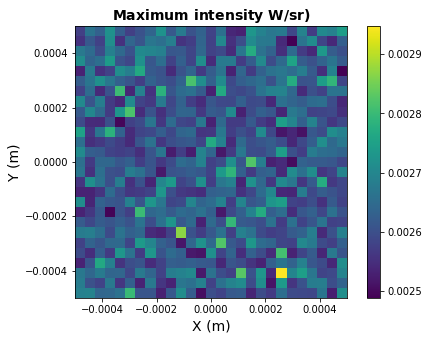

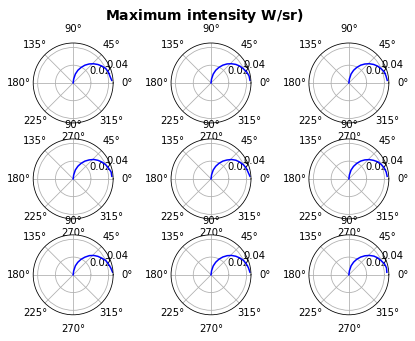

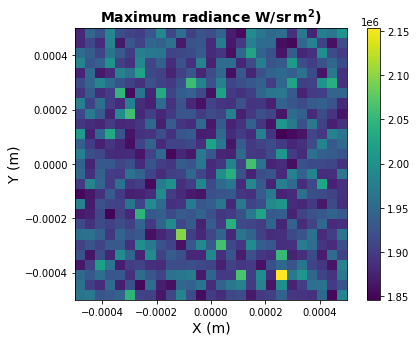

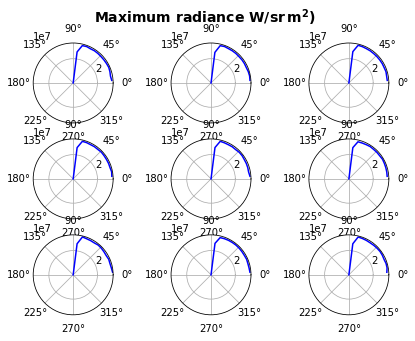

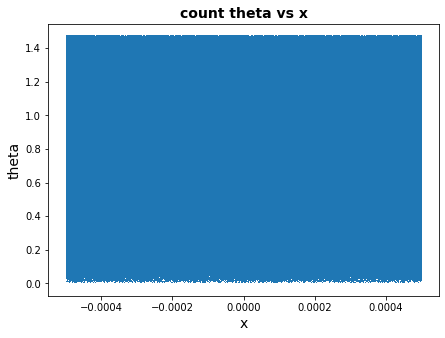

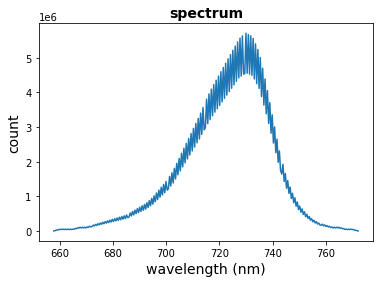

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Lightbox

total photons: 1.70e+16
photon bundle count: 3.41e+08
photon total energy (J): 4.69e-03
photon total power (W): 4.69e+00


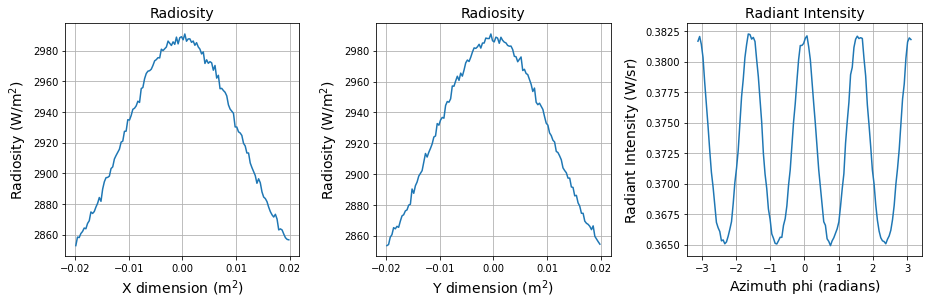

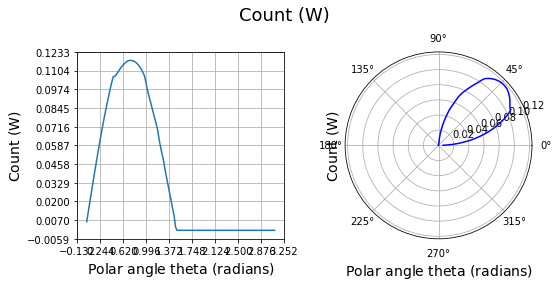

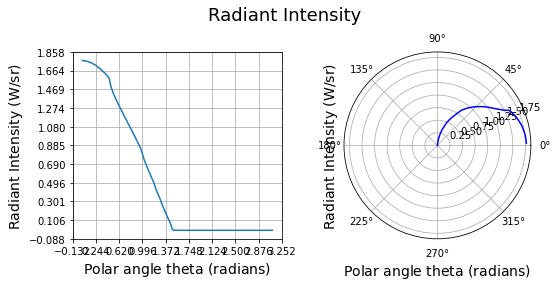

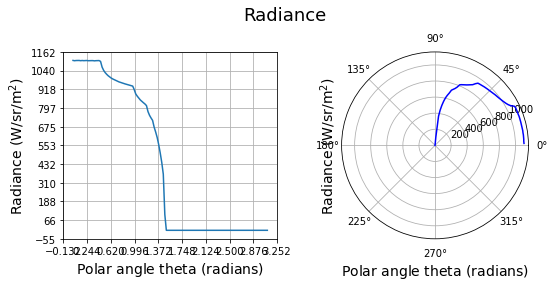

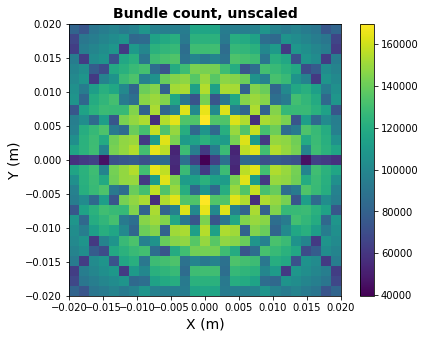

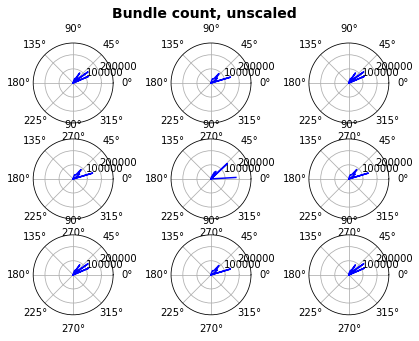

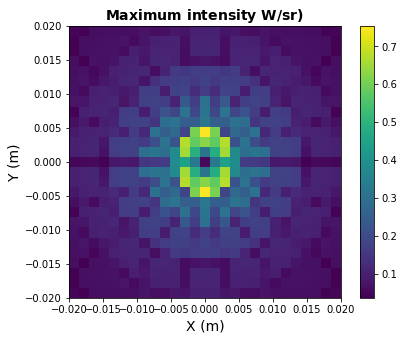

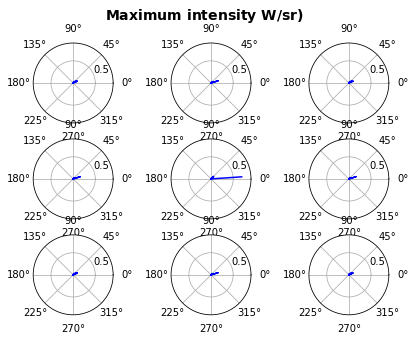

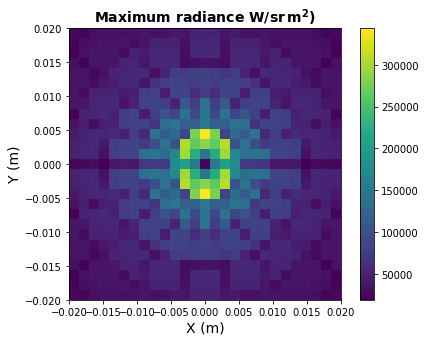

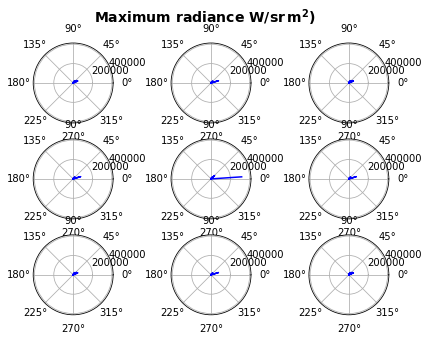

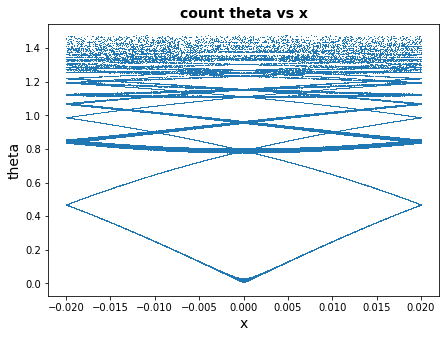

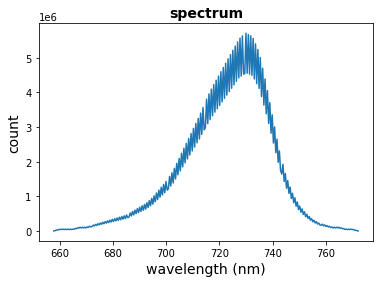

Output()

In [5]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

# <center> Diffuser

total photons: 1.06e+16
photon bundle count: 2.12e+08
photon total energy (J): 2.92e-03
photon total power (W): 2.92e+00


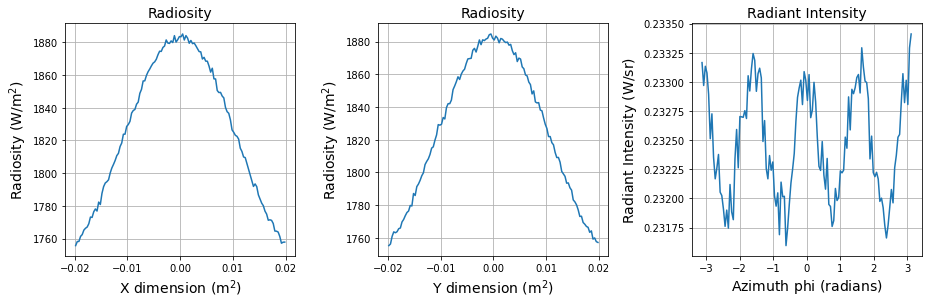

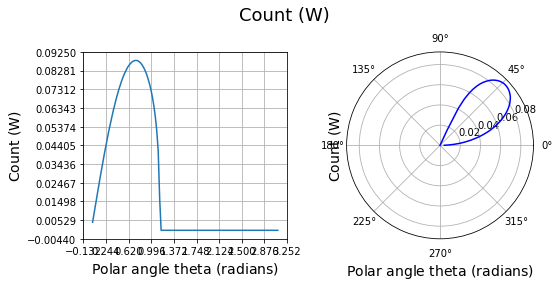

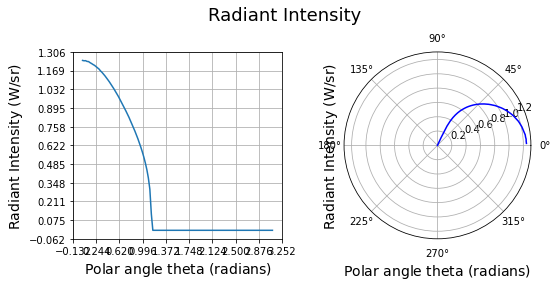

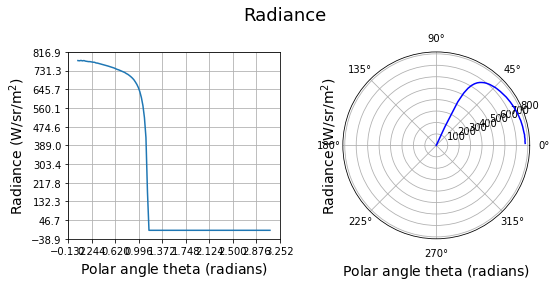

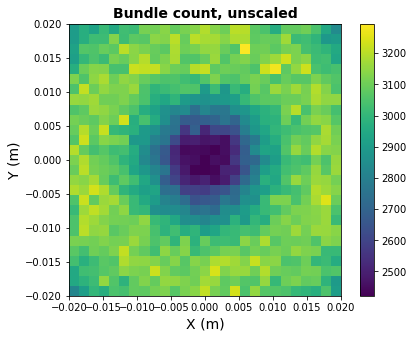

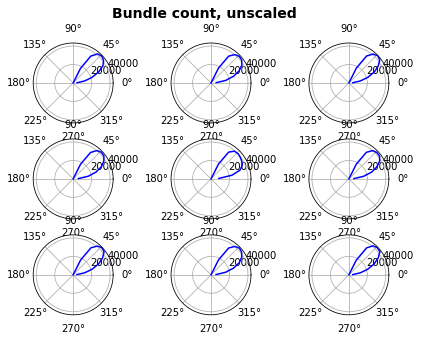

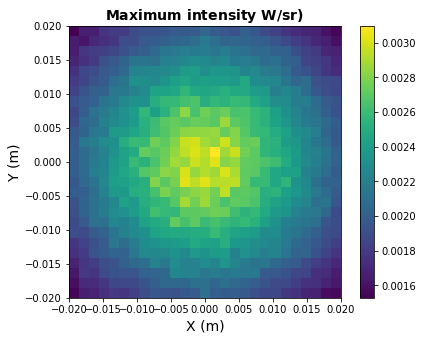

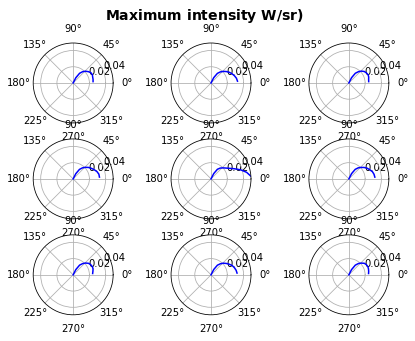

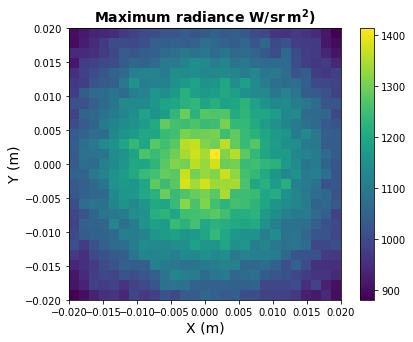

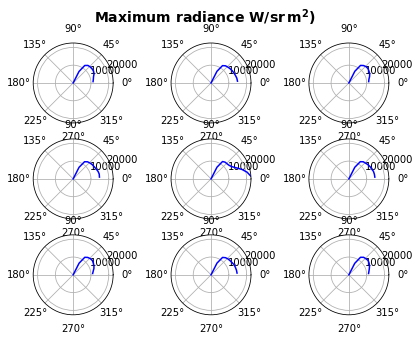

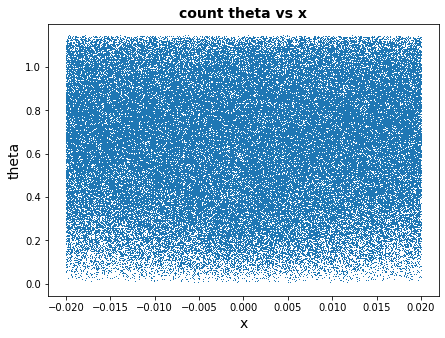

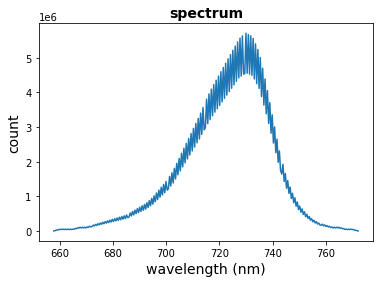

Output()

In [6]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

# <center> Outbound

total photons: 4.61e+11
photon bundle count: 9.21e+03
photon total energy (J): 1.27e-07
photon total power (W): 1.27e-04


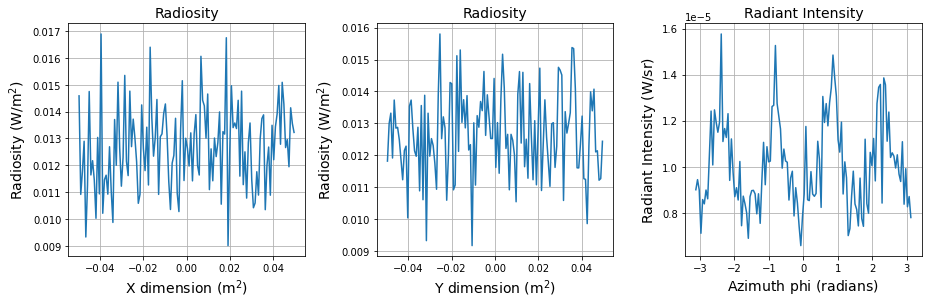

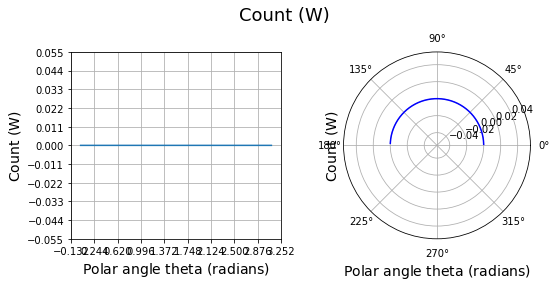

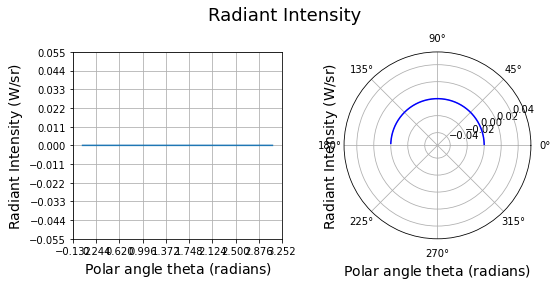

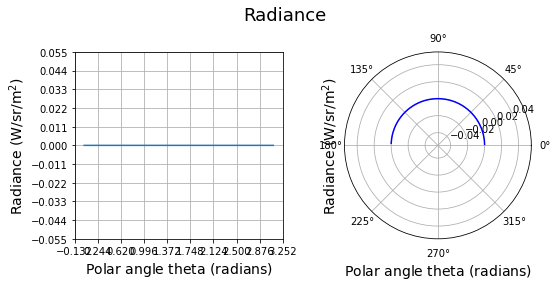

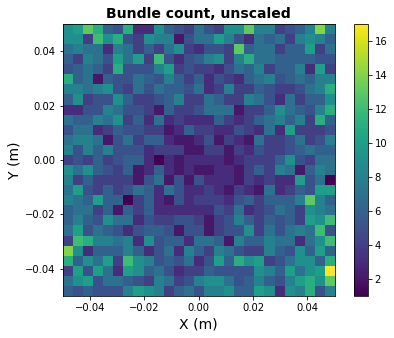

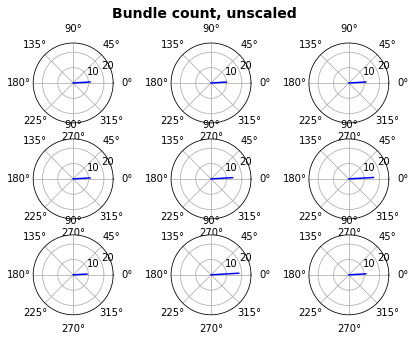

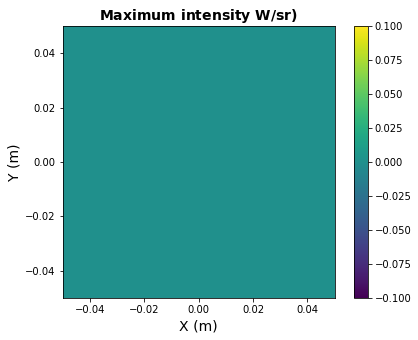

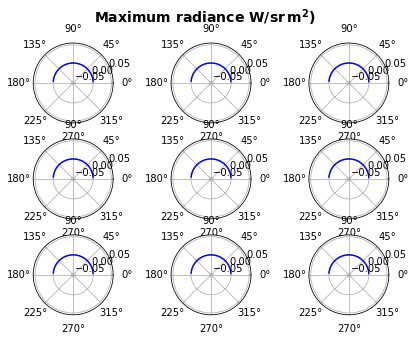

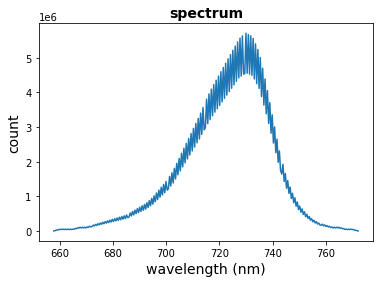

Output()

In [7]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

# <center> Inbound

total photons: 4.61e+11
photon bundle count: 9.21e+03
photon total energy (J): 1.27e-07
photon total power (W): 1.27e-04


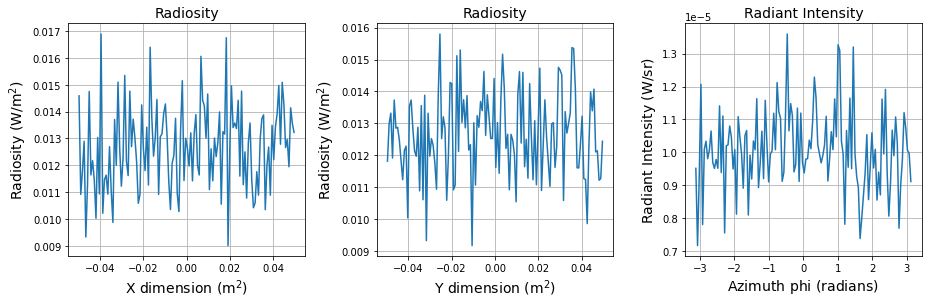

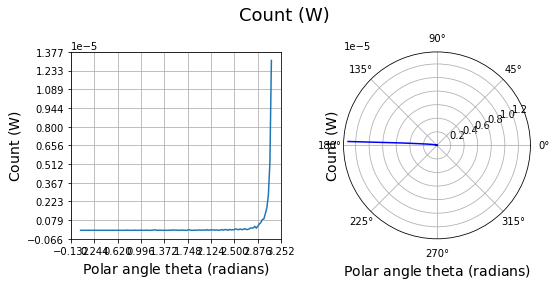

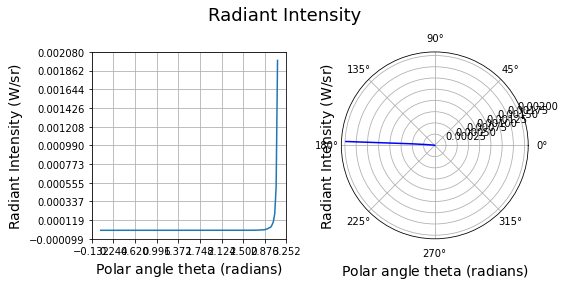

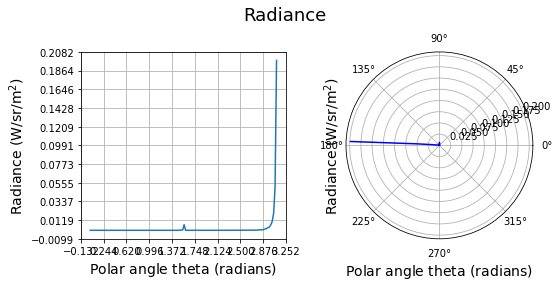

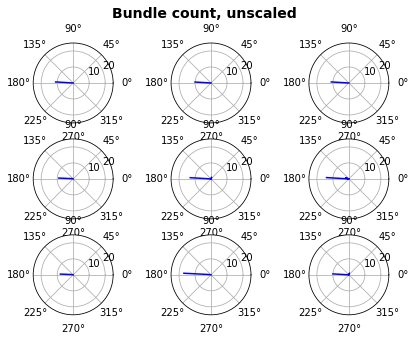

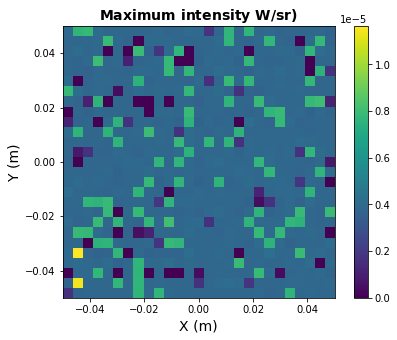

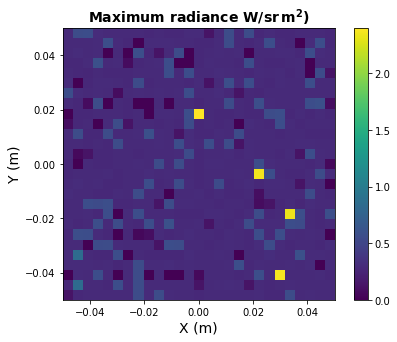

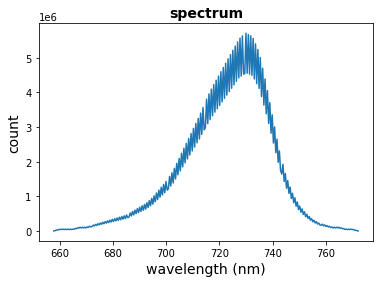

Output()

In [8]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

# <center> Camera Plane

total photons: 2.05e+11
photon bundle count: 4.09e+03
photon total energy (J): 5.62e-08
photon total power (W): 5.62e-05


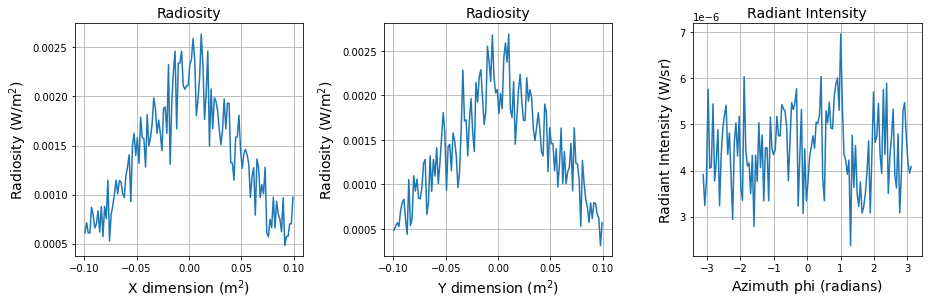

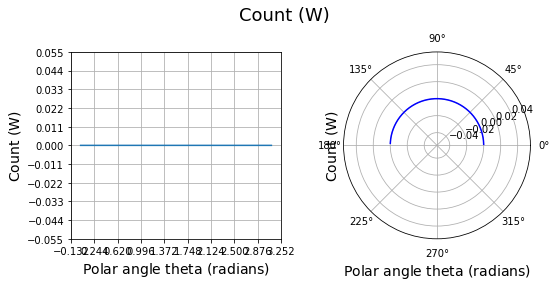

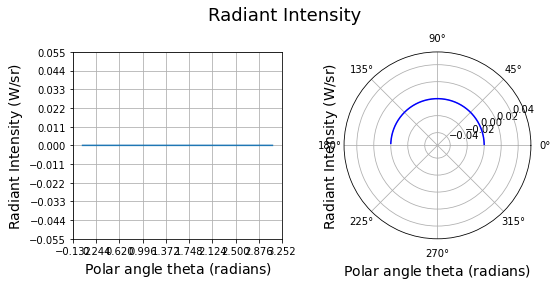

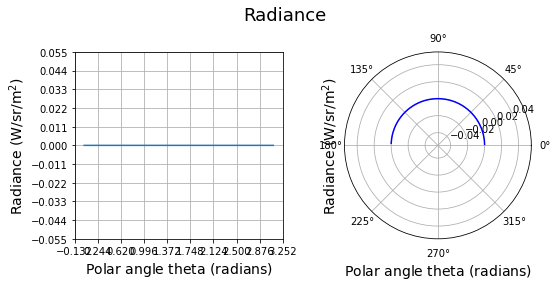

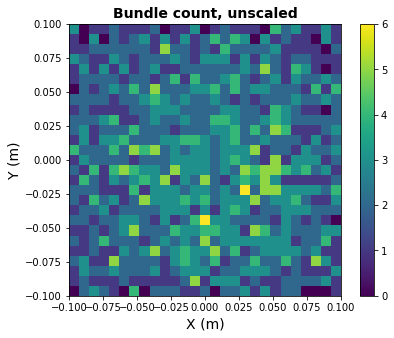

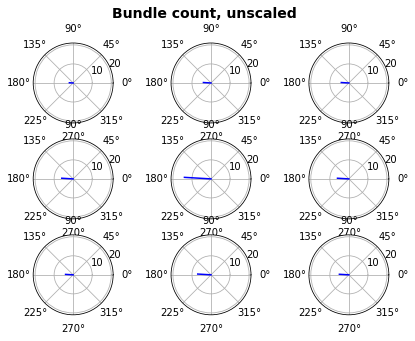

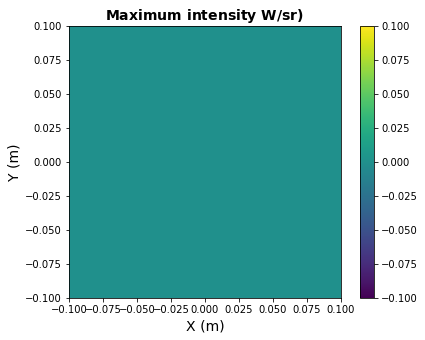

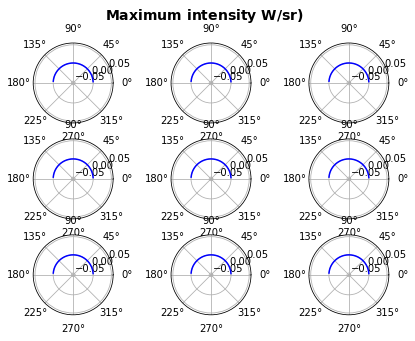

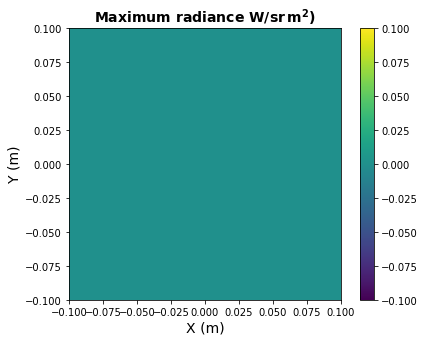

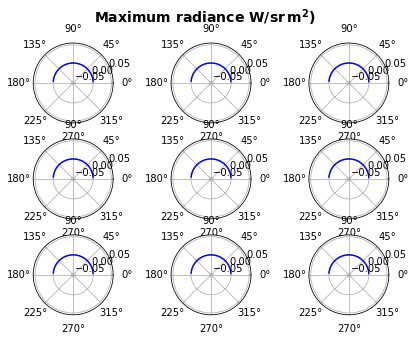

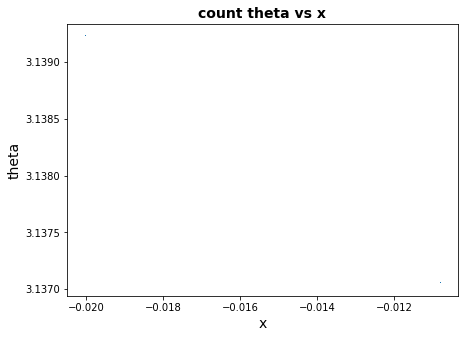

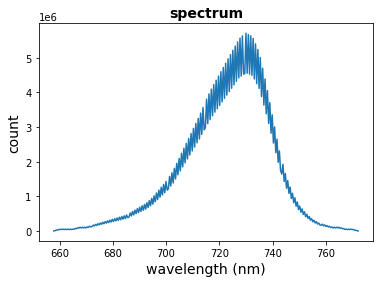

Output()

In [9]:
# before the filter
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

total photons: 1.75e+11
photon bundle count: 3.49e+03
photon total energy (J): 4.80e-08
photon total power (W): 4.80e-05


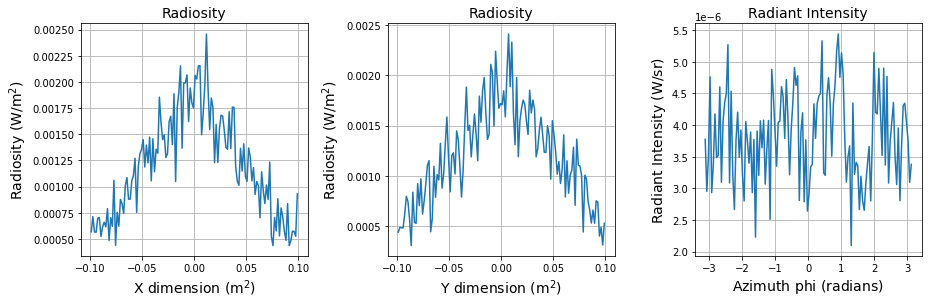

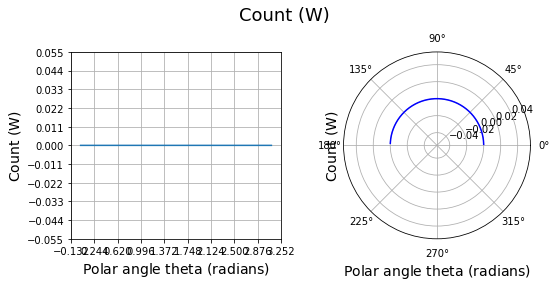

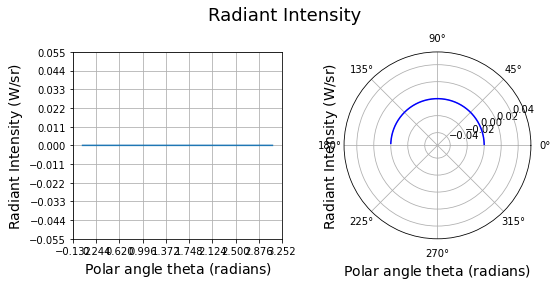

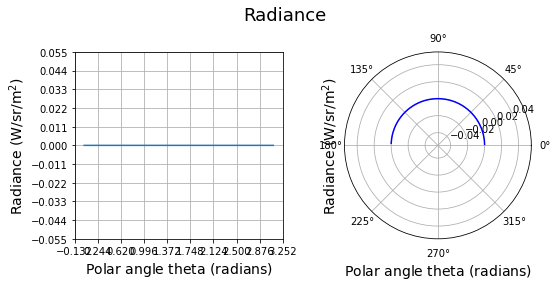

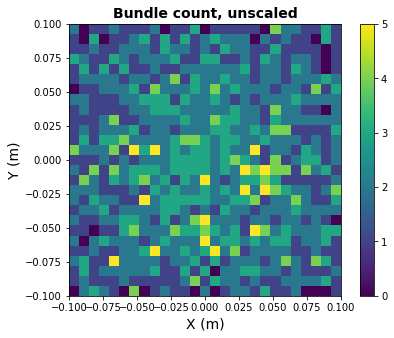

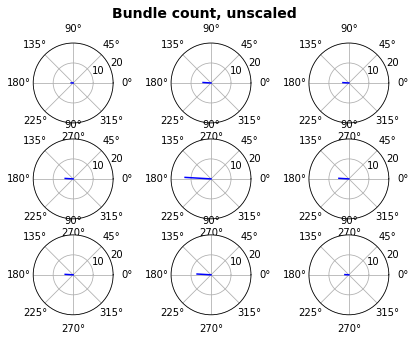

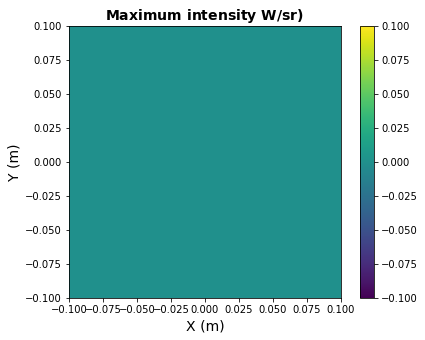

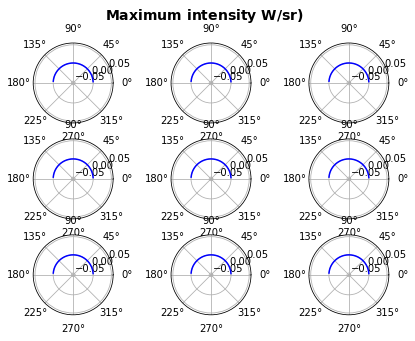

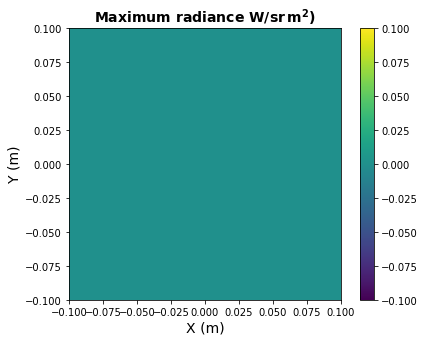

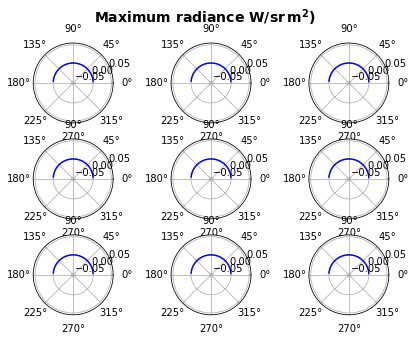

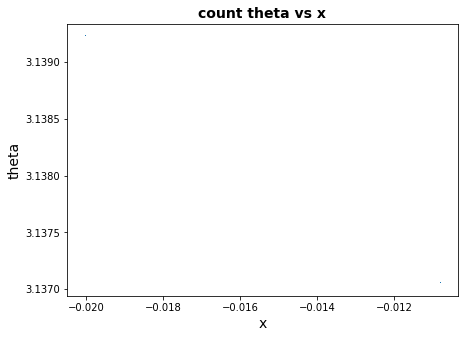

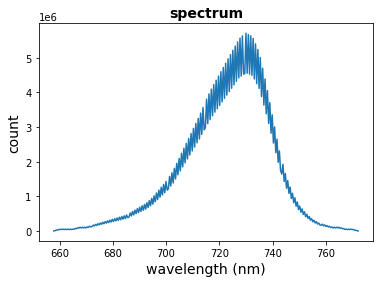

Output()

In [10]:
# after the filter
viz_cuda.summary(results._filter_stage)
viz_cuda.plot_all_histograms(results._filter_stage)
viz_cuda.plot_stages_3d([results._filter_stage])

total photons: 1.35e+09
photon bundle count: 2.70e+01
photon total energy (J): 3.71e-10
photon total power (W): 3.71e-07


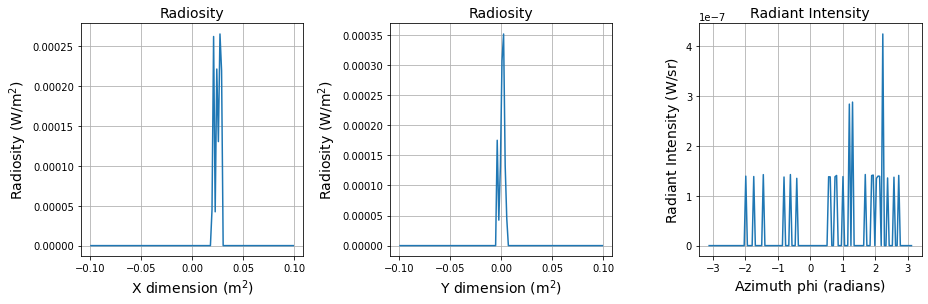

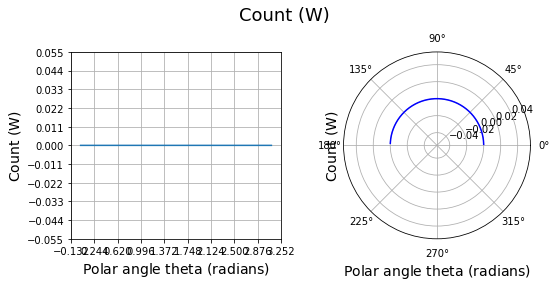

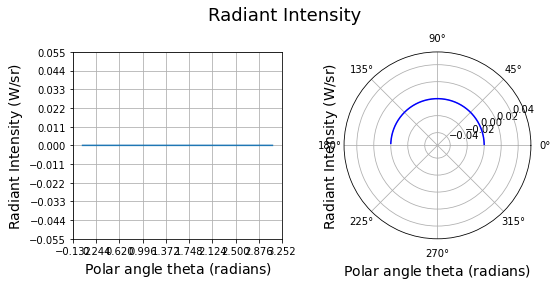

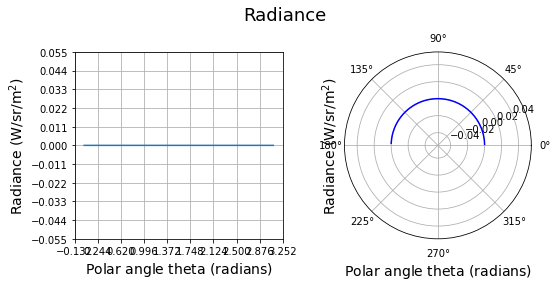

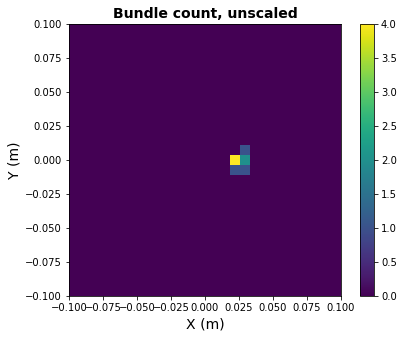

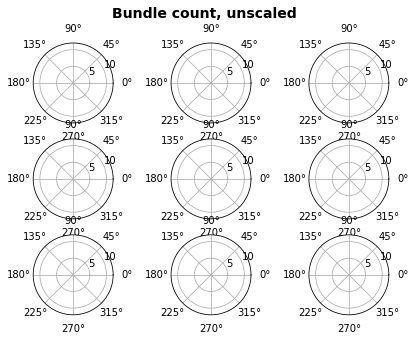

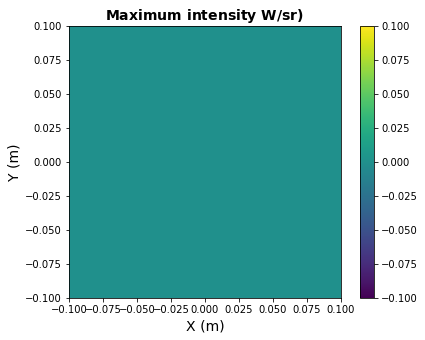

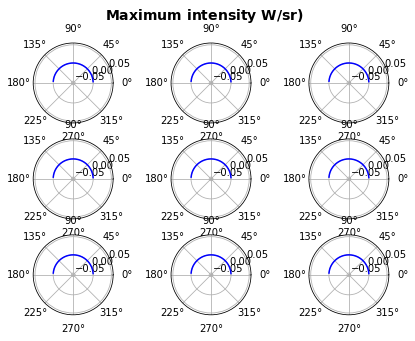

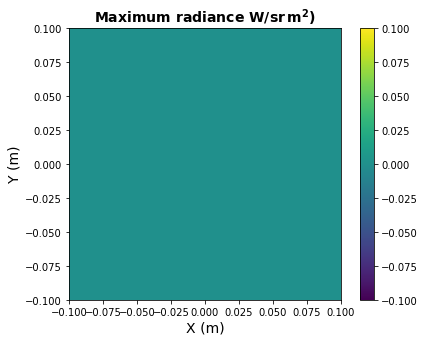

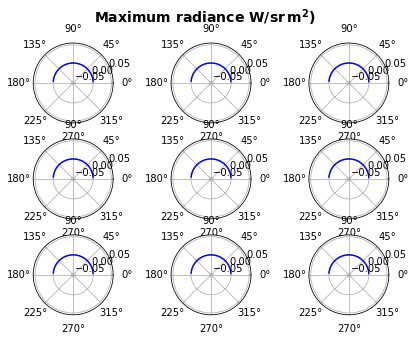

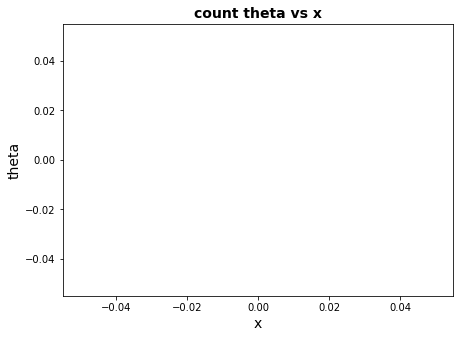

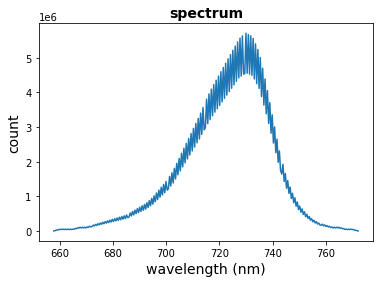

Output()

In [11]:
# same as the camera dimensions
viz_cuda.summary(results._camera_lens_stage)
viz_cuda.plot_all_histograms(results._camera_lens_stage)
viz_cuda.plot_stages_3d([results._camera_lens_stage])

In [12]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])

Output()

In [13]:
print(f"camera total {simulator._camera._total_photons:.2e}")

camera total 1.35e+09
